La descarga fue seguida del archivo csv provisto por el profesor

In [3]:
import pandas as pd
file_path = r"C:\Users\river\OneDrive\Documentos\Maestrías\Maestría ITESO\Semestre 3\Modelado Predictivo\Homework 4 SVM\nyc_vehicle_collisions.csv"
df = pd.read_csv(file_path)

C:\Users\river\AppData\Local\Temp\ipykernel_73216\781015344.py:3: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [5]:
df.shape

(2162917, 29)

In [6]:
df.head()

,crash_date,crash_time,on_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,latitude,longitude,location,contributing_factor_vehicle_3,vehicle_type_code_3,cross_street_name,contributing_factor_vehicle_4,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5
0,2021-09-11T00:00:00.000,2:39,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-26T00:00:00.000,11:45,QUEENSBORO BRIDGE UPPER,NaN,1.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-11-01T00:00:00.000,1:29,OCEAN PARKWAY,AVENUE K,1.0,0.0,0,0,0,0,...,40.62179,-73.970024,"{'latitude': '40.62179', 'longitude': '-73.970...",Unspecified,Sedan,NaN,NaN,NaN,NaN,NaN
3,2022-06-29T00:00:00.000,6:55,THROGS NECK BRIDGE,NaN,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-09-21T00:00:00.000,13:21,BROOKLYN BRIDGE,NaN,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.columns

Index(['crash_date', 'crash_time', 'on_street_name', 'off_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
       'collision_id', 'vehicle_type_code1', 'vehicle_type_code2', 'borough',
       'zip_code', 'latitude', 'longitude', 'location',
       'contributing_factor_vehicle_3', 'vehicle_type_code_3',
       'cross_street_name', 'contributing_factor_vehicle_4',
       'vehicle_type_code_4', 'contributing_factor_vehicle_5',
       'vehicle_type_code_5'],
      dtype='object')

Basado en las indicaciones de la clase los apartados verdes son las variables de respuesta o "y" clasificado durante sesiones anteriores como: 
'number_of_persons_injured', 'number_of_persons_killed', 'number_of_pedestrians_injured', 'number_of_pedestrians_killed','number_of_cyclist_injured', 
'number_of_cyclist_killed','number_of_motorist_injured', 'number_of_motorist_killed'.

Las "x" serían las 'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
       'collision_id', 'vehicle_type_code1', 'vehicle_type_code2', 'borough',
       'zip_code', 'latitude', 'longitude', 'location',
       'contributing_factor_vehicle_3', 'vehicle_type_code_3',
       'cross_street_name', 'contributing_factor_vehicle_4',
       'vehicle_type_code_4', 'contributing_factor_vehicle_5',
       'vehicle_type_code_5'. 

In [12]:
# Out of the example 
# 1. DATA CLEANING AND AGGREGATION
df = df[['number_of_persons_killed', 'borough', 'contributing_factor_vehicle_1', 'vehicle_type_code1']]
df = df[['number_of_persons_killed', 'contributing_factor_vehicle_1']]

# Remove rows with NA values in the selected columns
agg_df = df.groupby([ 'contributing_factor_vehicle_1'], as_index=False)['number_of_persons_killed'].sum()

# Convert categorical columns to dummy variables
agg_df = pd.get_dummies(agg_df, columns=[ 'contributing_factor_vehicle_1'], drop_first=True)

# Display the cleaned and aggregated data
print("\n✅ Aggregated Data Sample (Sum of Persons Killed):")
print(agg_df.head())


✅ Aggregated Data Sample (Sum of Persons Killed):
   number_of_persons_killed  contributing_factor_vehicle_1_80  \
0                       0.0                             False   
1                       0.0                              True   
2                       1.0                             False   
3                      23.0                             False   
4                     114.0                             False   

   contributing_factor_vehicle_1_Accelerator Defective  \
0                                              False     
1                                              False     
2                                               True     
3                                              False     
4                                              False     

   contributing_factor_vehicle_1_Aggressive Driving/Road Rage  \
0                                              False            
1                                              False            
2             

In [13]:
agg_df.dropna(inplace=True)

In [14]:
agg_df['risk_level'] = agg_df['number_of_persons_killed'].apply(lambda x: 1 if x >= 10 else 0)

In [17]:
agg_df.columns

Index(['number_of_persons_killed', 'contributing_factor_vehicle_1_80',
       'contributing_factor_vehicle_1_Accelerator Defective',
       'contributing_factor_vehicle_1_Aggressive Driving/Road Rage',
       'contributing_factor_vehicle_1_Alcohol Involvement',
       'contributing_factor_vehicle_1_Animals Action',
       'contributing_factor_vehicle_1_Backing Unsafely',
       'contributing_factor_vehicle_1_Brakes Defective',
       'contributing_factor_vehicle_1_Cell Phone (hand-Held)',
       'contributing_factor_vehicle_1_Cell Phone (hand-held)',
       'contributing_factor_vehicle_1_Cell Phone (hands-free)',
       'contributing_factor_vehicle_1_Driver Inattention/Distraction',
       'contributing_factor_vehicle_1_Driver Inexperience',
       'contributing_factor_vehicle_1_Driverless/Runaway Vehicle',
       'contributing_factor_vehicle_1_Drugs (Illegal)',
       'contributing_factor_vehicle_1_Drugs (illegal)',
       'contributing_factor_vehicle_1_Eating or Drinking',
       'co

In [18]:
# A partir de aquí podemos aplicar el primer data Quality Report de los datos prefiltrados
# Data Quality Report Function
def dqr(data):
    cols = pd.DataFrame(list(data.columns.values), columns=['Name'], 
                       index=list(data.columns.values))
    dtyp = pd.DataFrame(data.dtypes, columns=['Type'])
    misval = pd.DataFrame(data.isnull().sum(), columns=['N/A value'])
    presval = pd.DataFrame(data.count(), columns=['Count values'])
    unival = pd.DataFrame(columns=['Unique values'])
    minval = pd.DataFrame(columns=['Min'])
    maxval = pd.DataFrame(columns=['Max'])
    mean = pd.DataFrame(data.mean(), columns=['Mean'])
    std = pd.DataFrame(data.std(), columns=['Std'])
    var = pd.DataFrame(data.var(), columns=['Var'])
    median = pd.DataFrame(data.median(), columns=['Median'])
    skewness = pd.DataFrame(data.skew(), columns=['Skewness'])
    kurtosis = pd.DataFrame(data.kurtosis(), columns=['Kurtosis'])
    
    for col in list(data.columns.values):
        unival.loc[col] = [data[col].nunique()]
        try:
            minval.loc[col] = [data[col].min()]
            maxval.loc[col] = [data[col].max()]
        except:
            pass
    
    return cols.join(dtyp).join(misval).join(presval).join(unival).join(minval)\
           .join(maxval).join(mean).join(std).join(var).join(median)\
           .join(skewness).join(kurtosis)

In [16]:
# Generate initial report
report = dqr(agg_df)
print("Data Quality Report:")
print(report)

Data Quality Report:
                                                                                                 Name  \
number_of_persons_killed                                                     number_of_persons_killed   
contributing_factor_vehicle_1_80                                     contributing_factor_vehicle_1_80   
contributing_factor_vehicle_1_Accelerator Defec...  contributing_factor_vehicle_1_Accelerator Defe...   
contributing_factor_vehicle_1_Aggressive Drivin...  contributing_factor_vehicle_1_Aggressive Drivi...   
contributing_factor_vehicle_1_Alcohol Involvement   contributing_factor_vehicle_1_Alcohol Involvement   
...                                                                                               ...   
contributing_factor_vehicle_1_Using On Board Na...  contributing_factor_vehicle_1_Using On Board N...   
contributing_factor_vehicle_1_Vehicle Vandalism       contributing_factor_vehicle_1_Vehicle Vandalism   
contributing_factor_vehicle_1_View

In [20]:
import requests
import pandas as pd
import time

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Feature Selection basado en el código provisto
X = agg_df[[
'contributing_factor_vehicle_1_80',
'contributing_factor_vehicle_1_Accelerator Defective',
'contributing_factor_vehicle_1_Aggressive Driving/Road Rage',
'contributing_factor_vehicle_1_Alcohol Involvement',
'contributing_factor_vehicle_1_Animals Action']]

y = agg_df['risk_level']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
#Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Logistic regression
# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


📊 Model Performance Metrics:
Accuracy: 0.6316
Precision: 0.3989
Recall: 0.6316
F1-score: 0.4890
ROC AUC: 0.4583


C:\Users\river\anaconda3\envs\my_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


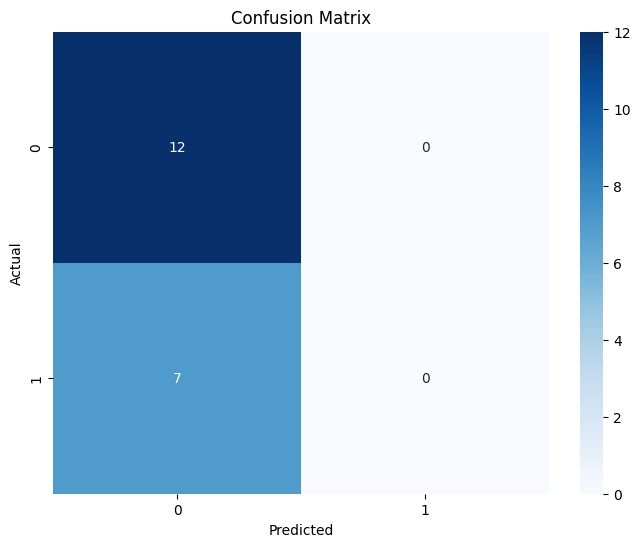

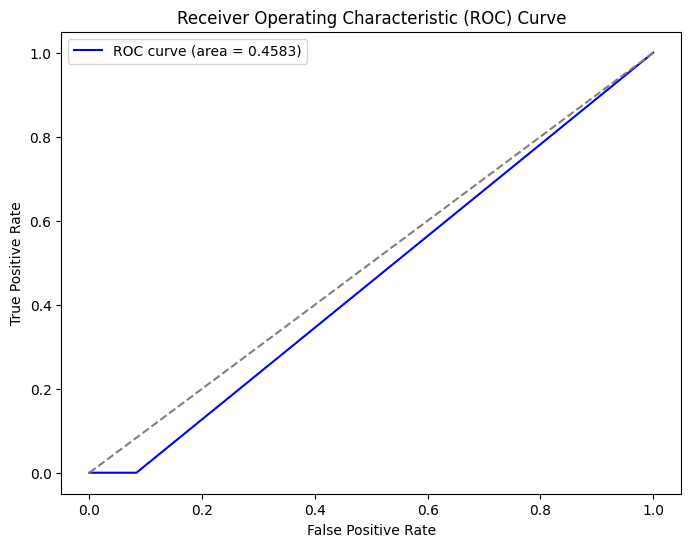

In [23]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#y_test = y_test.flatten()

roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("\n📊 Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()